In [450]:
%matplotlib inline

from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [451]:
breast_cancer=datasets.load_breast_cancer()
print(breast_cancer.DESCR)
print(breast_cancer)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [452]:
X=pd.DataFrame(breast_cancer['data'],columns=breast_cancer['feature_names'])
print(X.head())
print(X.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

In [453]:
y= pd.DataFrame(breast_cancer['target'], columns=['target_names'])
print(y.head())
print(y.shape)

   target_names
0             0
1             0
2             0
3             0
4             0
(569, 1)


In [454]:
breast_data=pd.concat([X,y],axis=1)
print(breast_data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

In [455]:
#標準化數據

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
print()
#print(sc.mean_)  #mean
#print(sc.scale_) #standard deviation
print('進行標準化前:')
print('平均值:')
print(X.mean())  #mean
print('標準差:')
print(X.std())   #standard deviation

X_std = sc.transform(X)
print('-------------------------------------------------------')
print('進行標準化後:')
X_std=pd.DataFrame(X_std,columns=breast_cancer['feature_names'])
print('平均值:')
print(X_std.mean())  #mean
print('標準差:')
print(X_std.std())   #standard deviation



進行標準化前:
平均值:
mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.25426

In [456]:
#print(X_std.head())
#print(X_std.shape)

In [457]:
y=np.ravel(y)
y.shape

(569,)

In [458]:
X_train_std,X_test_std,y_train_std,y_test_std=train_test_split(X_std,y,test_size=0.2,random_state=10)

In [459]:
print(X_train_std.head())
X_train_std.shape

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
567     1.838341      2.336457        1.982524   1.735218         1.525767   
295    -0.101476     -1.400813       -0.161014  -0.205313        -0.311725   
91      0.352947      0.807574        0.339035   0.208504        -0.310301   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
94      0.264902      0.125743        0.343154   0.144227         0.536567   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
567          3.272144        3.296944             2.658866       2.137194   
295         -0.798444       -0.981414            -0.767349      -0.801815   
91          -0.014043        0.293795             0.668344      -0.345447   
1           -0.487072       -0.023846             0.548144       0.001392   
94           0.965749        1.019472             1.011920       0.158383   

     mean fractal dimension  radius error  texture error  perimeter 

(455, 30)

In [460]:
print(X_test_std.head())
X_test_std.shape

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
172     0.378508     -1.721948        0.433773   0.233247         2.087974   
553    -1.361647      0.616755       -1.357589  -1.111729        -0.281835   
374    -0.124197     -0.749234       -0.170076  -0.215552        -0.949367   
370     0.631281      0.930909        0.701509   0.527612         0.075415   
419    -0.842753      0.493420       -0.865778  -0.780960         0.387120   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
172          0.969539        1.436297             1.567780       0.563638   
553         -0.915186       -0.613176            -0.931141      -0.436721   
374         -0.769449       -0.793968            -0.737944       0.220449   
370          0.859620        1.158832             1.001086       1.326685   
419         -0.844497       -1.002443            -0.984276      -0.717843   

     mean fractal dimension  radius error  texture error  perimeter 

(114, 30)

In [461]:
#測試AdaBoostClassifier,進行標準化前後是否影響特徵重要度排序
#先測試標準化後數據的特徵重要度排序

from sklearn.ensemble import AdaBoostClassifier
AdaBoost_std = AdaBoostClassifier(n_estimators=100) 


AdaBoost_std.fit(X_train_std, y_train_std)
pred_std = AdaBoost_std.predict(X_test_std)

print('training score:',AdaBoost_std.score(X_train_std,y_train_std))
print('test score:',AdaBoost_std.score(X_test_std,y_test_std))
print('-----------------------------------------')

print("繪製confusion_matrix")
print(confusion_matrix(y_test_std,pred_std))
print(classification_report(y_test_std,pred_std))
print('-----------------------------------------')




training score: 1.0
test score: 0.9649122807017544
-----------------------------------------
繪製confusion_matrix
[[38  1]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

-----------------------------------------


In [462]:
print("進行K-fold驗證")
scores = cross_val_score(AdaBoost_std, X_std, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())


進行K-fold驗證
Fold 1: 0.9473684210526315
Fold 2: 0.956140350877193
Fold 3: 0.9912280701754386
Fold 4: 0.9912280701754386
Fold 5: 0.9823008849557522
Mean Score: 0.9736531594472908


In [463]:
importances_std = AdaBoost_std.feature_importances_
importances_std_formatted_array = [round(num, 2) for num in importances_std]
print(importances_std)

indices_std = np.argsort(importances_std)[::-1]  # 使用[::-1]取反得到降序排序
print(indices_std)

std_important_feature_sort_descend = breast_cancer.feature_names[indices_std]
scores_mean_descend = importances_std[indices_std]

print('特徵重要度排序：')
print(std_important_feature_sort_descend)



[0.   0.06 0.   0.03 0.03 0.06 0.01 0.07 0.03 0.01 0.02 0.01 0.01 0.07
 0.01 0.03 0.01 0.01 0.05 0.05 0.01 0.07 0.05 0.04 0.11 0.   0.04 0.04
 0.04 0.03]
[24 21  7 13  1  5 19 22 18 27 26 23 28 15 29  4  8  3 10  6 14  9 11 12
 16 17 20  2 25  0]
特徵重要度排序：
['worst smoothness' 'worst texture' 'mean concave points' 'area error'
 'mean texture' 'mean compactness' 'fractal dimension error'
 'worst perimeter' 'symmetry error' 'worst concave points'
 'worst concavity' 'worst area' 'worst symmetry' 'compactness error'
 'worst fractal dimension' 'mean smoothness' 'mean symmetry' 'mean area'
 'radius error' 'mean concavity' 'smoothness error'
 'mean fractal dimension' 'texture error' 'perimeter error'
 'concavity error' 'concave points error' 'worst radius' 'mean perimeter'
 'worst compactness' 'mean radius']


In [464]:
print('AdaBoost標準化後特徵重要度排序前10名：')
for i in range(10):
    print('第', i+1, '名')
    print(std_important_feature_sort_descend[i])
    print(scores_mean_descend[i])

AdaBoost標準化後特徵重要度排序前10名：
第 1 名
worst smoothness
0.11
第 2 名
worst texture
0.07
第 3 名
mean concave points
0.07
第 4 名
area error
0.07
第 5 名
mean texture
0.06
第 6 名
mean compactness
0.06
第 7 名
fractal dimension error
0.05
第 8 名
worst perimeter
0.05
第 9 名
symmetry error
0.05
第 10 名
worst concave points
0.04


In [465]:
#不使用標準化，測試特徵重要度排序是否相同
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

AdaBoost = AdaBoostClassifier(n_estimators=100) 
AdaBoost.fit(X_train, y_train)
pred = AdaBoost.predict(X_test)

print('training score:',AdaBoost.score(X_train,y_train))
print('test score:',AdaBoost.score(X_test,y_test))
print('-----------------------------------------')
print("繪製confusion_matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('-----------------------------------------')
print("進行K-fold驗證")
scores = cross_val_score(AdaBoost_std, X, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())


training score: 1.0
test score: 0.9649122807017544
-----------------------------------------
繪製confusion_matrix
[[38  1]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

-----------------------------------------
進行K-fold驗證
Fold 1: 0.9473684210526315
Fold 2: 0.9649122807017544
Fold 3: 0.9912280701754386
Fold 4: 0.9912280701754386
Fold 5: 0.9823008849557522
Mean Score: 0.9754075454122031


In [466]:
importances = AdaBoost.feature_importances_

indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array.


In [467]:
important_feature_sort_ascend=breast_cancer.feature_names[indices]
important_feature_sort_descend=important_feature_sort_ascend[::-1]



print('特徵重要度排序：')
print(important_feature_sort_descend)

特徵重要度排序：
['worst smoothness' 'worst texture' 'mean concave points' 'area error'
 'mean texture' 'mean compactness' 'fractal dimension error'
 'worst perimeter' 'symmetry error' 'worst concave points'
 'worst concavity' 'worst area' 'worst symmetry' 'compactness error'
 'worst fractal dimension' 'mean smoothness' 'mean symmetry' 'mean area'
 'radius error' 'mean concavity' 'smoothness error'
 'mean fractal dimension' 'texture error' 'perimeter error'
 'concavity error' 'concave points error' 'worst radius' 'mean perimeter'
 'worst compactness' 'mean radius']


In [468]:
scores_mean_descend=importances[indices][::-1]
print('AdaBoost標準化前特徵重要度排序前10名：')
for i in range(10):
    print('第', i+1, '名')
    print(std_important_feature_sort_descend[i])
    print(scores_mean_descend[i])

AdaBoost標準化前特徵重要度排序前10名：
第 1 名
worst smoothness
0.11
第 2 名
worst texture
0.07
第 3 名
mean concave points
0.07
第 4 名
area error
0.07
第 5 名
mean texture
0.06
第 6 名
mean compactness
0.06
第 7 名
fractal dimension error
0.05
第 8 名
worst perimeter
0.05
第 9 名
symmetry error
0.05
第 10 名
worst concave points
0.04


In [469]:
print('標準化後的特徵重要度排序:',std_important_feature_sort_descend)
print('標準化前的特徵重要度排序:',important_feature_sort_descend)

differences=np.where(important_feature_sort_descend!=std_important_feature_sort_descend)[0]
print(differences)


標準化後的特徵重要度排序: ['worst smoothness' 'worst texture' 'mean concave points' 'area error'
 'mean texture' 'mean compactness' 'fractal dimension error'
 'worst perimeter' 'symmetry error' 'worst concave points'
 'worst concavity' 'worst area' 'worst symmetry' 'compactness error'
 'worst fractal dimension' 'mean smoothness' 'mean symmetry' 'mean area'
 'radius error' 'mean concavity' 'smoothness error'
 'mean fractal dimension' 'texture error' 'perimeter error'
 'concavity error' 'concave points error' 'worst radius' 'mean perimeter'
 'worst compactness' 'mean radius']
標準化前的特徵重要度排序: ['worst smoothness' 'worst texture' 'mean concave points' 'area error'
 'mean texture' 'mean compactness' 'fractal dimension error'
 'worst perimeter' 'symmetry error' 'worst concave points'
 'worst concavity' 'worst area' 'worst symmetry' 'compactness error'
 'worst fractal dimension' 'mean smoothness' 'mean symmetry' 'mean area'
 'radius error' 'mean concavity' 'smoothness error'
 'mean fractal dimension' 'textu

In [470]:
'''
AdaBoost的核心思想是根據先前分類器的錯誤來加權訓練數據，以便下一個分類器可以更好地處理錯誤分類的樣本。
這種加權過程可以讓AdaBoost在處理非線性、不平衡或具有噪聲的數據時表現出很強的魯棒性。
AdaBoost本身不要求對數據進行標準化或縮放，但根據具體情況和數據特點，雖然
可以選擇在訓練之前對數據進行適當的標準化或縮放操作，以獲得更好的結果。
然對於該breast cancer數據判斷良性或惡性腫瘤而言，數據是否標準化並不影響AdaBoost對特徵的重要度排序。
'''

'\nAdaBoost的核心思想是根據先前分類器的錯誤來加權訓練數據，以便下一個分類器可以更好地處理錯誤分類的樣本。\n這種加權過程可以讓AdaBoost在處理非線性、不平衡或具有噪聲的數據時表現出很強的魯棒性。\nAdaBoost本身不要求對數據進行標準化或縮放，但根據具體情況和數據特點，雖然\n可以選擇在訓練之前對數據進行適當的標準化或縮放操作，以獲得更好的結果。\n然對於該breast cancer數據判斷良性或惡性腫瘤而言，數據是否標準化並不影響AdaBoost對特徵的重要度排序。\n'

In [471]:
#AdaBoost演算法的特徵重要度排序
AdaBoost_feature=important_feature_sort_descend
print(AdaBoost_feature)

['worst smoothness' 'worst texture' 'mean concave points' 'area error'
 'mean texture' 'mean compactness' 'fractal dimension error'
 'worst perimeter' 'symmetry error' 'worst concave points'
 'worst concavity' 'worst area' 'worst symmetry' 'compactness error'
 'worst fractal dimension' 'mean smoothness' 'mean symmetry' 'mean area'
 'radius error' 'mean concavity' 'smoothness error'
 'mean fractal dimension' 'texture error' 'perimeter error'
 'concavity error' 'concave points error' 'worst radius' 'mean perimeter'
 'worst compactness' 'mean radius']


In [472]:
#測試RandomForestClassifier,進行標準化前後是否影響特徵重要度排序
#先測試標準化後數據的特徵重要度排序

X_train_std,X_test_std,y_train_std,y_test_std=train_test_split(X_std,y,test_size=0.2,random_state=10)
print(X_train_std.head())
X_train_std.shape

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
567     1.838341      2.336457        1.982524   1.735218         1.525767   
295    -0.101476     -1.400813       -0.161014  -0.205313        -0.311725   
91      0.352947      0.807574        0.339035   0.208504        -0.310301   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
94      0.264902      0.125743        0.343154   0.144227         0.536567   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
567          3.272144        3.296944             2.658866       2.137194   
295         -0.798444       -0.981414            -0.767349      -0.801815   
91          -0.014043        0.293795             0.668344      -0.345447   
1           -0.487072       -0.023846             0.548144       0.001392   
94           0.965749        1.019472             1.011920       0.158383   

     mean fractal dimension  radius error  texture error  perimeter 

(455, 30)

In [473]:
from sklearn.ensemble import RandomForestClassifier

forest_std = RandomForestClassifier(criterion='entropy', n_estimators=100,random_state=0,n_jobs=10)
forest_std.fit(X_train_std,y_train_std)
pred_std = forest_std.predict(X_test_std)

print('training score:',forest_std.score(X_train_std,y_train_std))
print('test score:',forest_std.score(X_test_std,y_test_std))


training score: 1.0
test score: 0.9824561403508771


In [474]:
print(confusion_matrix(y_test_std,pred_std))
print(classification_report(y_test,pred_std))

[[39  0]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [475]:
scores = cross_val_score(forest_std, X_std, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9473684210526315
Fold 2: 0.9298245614035088
Fold 3: 0.9912280701754386
Fold 4: 0.9736842105263158
Fold 5: 0.9734513274336283
Mean Score: 0.9631113181183046


In [476]:
importances_std = forest_std.feature_importances_
importances_std_formatted_array = [round(num, 2) for num in importances_std]
print(importances_std_formatted_array)
indices_std = np.argsort(importances_std)  #np.argsort :Returns the indices that would sort an array.
print(indices_std)

[0.04, 0.02, 0.07, 0.05, 0.01, 0.01, 0.05, 0.07, 0.0, 0.0, 0.02, 0.01, 0.01, 0.04, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.11, 0.02, 0.17, 0.07, 0.02, 0.01, 0.02, 0.12, 0.01, 0.01]
[ 8 14 19  9 15 17 16 11  4 18 12 25 29  5 28 24 10  1 26 21 13  0  3  6
  2  7 23 20 27 22]


In [477]:
std_important_feature_sort_ascend=breast_cancer.feature_names[indices_std]
std_important_feature_sort_descend=std_important_feature_sort_ascend[::-1]

print('特徵重要度排序：')
print(std_important_feature_sort_descend)

特徵重要度排序：
['worst perimeter' 'worst concave points' 'worst radius' 'worst area'
 'mean concave points' 'mean perimeter' 'mean concavity' 'mean area'
 'mean radius' 'area error' 'worst texture' 'worst concavity'
 'mean texture' 'radius error' 'worst smoothness' 'worst symmetry'
 'mean compactness' 'worst fractal dimension' 'worst compactness'
 'perimeter error' 'symmetry error' 'mean smoothness' 'texture error'
 'concavity error' 'concave points error' 'compactness error'
 'mean fractal dimension' 'fractal dimension error' 'smoothness error'
 'mean symmetry']


In [478]:
scores_mean_descend=importances_std[indices_std][::-1]
print('RandomForestClassifier標準化後特徵重要度排序前10名：')
for i in range(10):
    print('第', i+1, '名')
    print(std_important_feature_sort_descend[i])
    print(scores_mean_descend[i])

RandomForestClassifier標準化後特徵重要度排序前10名：
第 1 名
worst perimeter
0.17351898987710243
第 2 名
worst concave points
0.12122546127957205
第 3 名
worst radius
0.10904512014019425
第 4 名
worst area
0.07300596244768266
第 5 名
mean concave points
0.07186697208262177
第 6 名
mean perimeter
0.07171383430487879
第 7 名
mean concavity
0.05435985721864484
第 8 名
mean area
0.04625303010225377
第 9 名
mean radius
0.037430642075498656
第 10 名
area error
0.03560738826235755


In [479]:
#不使用標準化，測試特徵重要度排序是否相同

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.head())
X_train.shape

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
567        20.60         29.33          140.10     1265.0          0.11780   
295        13.77         13.27           88.06      582.7          0.09198   
91         15.37         22.76          100.20      728.2          0.09200   
1          20.57         17.77          132.90     1326.0          0.08474   
94         15.06         19.83          100.30      705.6          0.10390   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
567           0.27700         0.35140              0.15200         0.2397   
295           0.06221         0.01063              0.01917         0.1592   
91            0.10360         0.11220              0.07483         0.1717   
1             0.07864         0.08690              0.07017         0.1812   
94            0.15530         0.17000              0.08815         0.1855   

     mean fractal dimension  radius error  texture error  perimeter 

(455, 30)

In [480]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100,random_state=0,n_jobs=10)
forest.fit(X_train,y_train)
pred = forest.predict(X_test)

print('training score:',forest.score(X_train,y_train))
print('test score:',forest.score(X_test,y_test))

training score: 1.0
test score: 0.9824561403508771


In [481]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[39  0]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [482]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest, X, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9473684210526315
Fold 2: 0.9298245614035088
Fold 3: 0.9912280701754386
Fold 4: 0.9736842105263158
Fold 5: 0.9734513274336283
Mean Score: 0.9631113181183046


In [483]:
importances = forest.feature_importances_
importances_formatted_array = [round(num, 2) for num in importances]
print(importances_formatted_array)
indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array.
print(indices)

[0.04, 0.02, 0.07, 0.05, 0.01, 0.01, 0.05, 0.07, 0.0, 0.0, 0.02, 0.01, 0.01, 0.04, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.11, 0.02, 0.17, 0.07, 0.02, 0.01, 0.02, 0.12, 0.01, 0.01]
[ 8 14 19  9 15 17 16 11  4 18 12 25 29  5 28 24 10  1 26 21 13  0  3  6
  2  7 23 20 27 22]


In [484]:
important_feature_sort_ascend=breast_cancer.feature_names[indices]
important_feature_sort_descend=important_feature_sort_ascend[::-1]

print('特徵重要度排序：')
print(important_feature_sort_descend)

特徵重要度排序：
['worst perimeter' 'worst concave points' 'worst radius' 'worst area'
 'mean concave points' 'mean perimeter' 'mean concavity' 'mean area'
 'mean radius' 'area error' 'worst texture' 'worst concavity'
 'mean texture' 'radius error' 'worst smoothness' 'worst symmetry'
 'mean compactness' 'worst fractal dimension' 'worst compactness'
 'perimeter error' 'symmetry error' 'mean smoothness' 'texture error'
 'concavity error' 'concave points error' 'compactness error'
 'mean fractal dimension' 'fractal dimension error' 'smoothness error'
 'mean symmetry']


In [485]:
scores_mean_descend=importances[indices][::-1]
print('RandomForestClassifier標準化前特徵重要度排序前10名：')
for i in range(10):
    print('第', i+1, '名')
    print(std_important_feature_sort_descend[i])
    print(scores_mean_descend[i])

RandomForestClassifier標準化前特徵重要度排序前10名：
第 1 名
worst perimeter
0.17351898987710243
第 2 名
worst concave points
0.12122546127957205
第 3 名
worst radius
0.10904512014019425
第 4 名
worst area
0.07300596244768266
第 5 名
mean concave points
0.07186697208262177
第 6 名
mean perimeter
0.07171383430487879
第 7 名
mean concavity
0.05435985721864484
第 8 名
mean area
0.04625303010225377
第 9 名
mean radius
0.037430642075498656
第 10 名
area error
0.03560738826235755


In [486]:
print('標準化後的特徵重要度排序:',std_important_feature_sort_descend)
print('標準化前的特徵重要度排序:',important_feature_sort_descend)

differences=np.where(important_feature_sort_descend!=std_important_feature_sort_descend)[0]
print(differences)

標準化後的特徵重要度排序: ['worst perimeter' 'worst concave points' 'worst radius' 'worst area'
 'mean concave points' 'mean perimeter' 'mean concavity' 'mean area'
 'mean radius' 'area error' 'worst texture' 'worst concavity'
 'mean texture' 'radius error' 'worst smoothness' 'worst symmetry'
 'mean compactness' 'worst fractal dimension' 'worst compactness'
 'perimeter error' 'symmetry error' 'mean smoothness' 'texture error'
 'concavity error' 'concave points error' 'compactness error'
 'mean fractal dimension' 'fractal dimension error' 'smoothness error'
 'mean symmetry']
標準化前的特徵重要度排序: ['worst perimeter' 'worst concave points' 'worst radius' 'worst area'
 'mean concave points' 'mean perimeter' 'mean concavity' 'mean area'
 'mean radius' 'area error' 'worst texture' 'worst concavity'
 'mean texture' 'radius error' 'worst smoothness' 'worst symmetry'
 'mean compactness' 'worst fractal dimension' 'worst compactness'
 'perimeter error' 'symmetry error' 'mean smoothness' 'texture error'
 'concavity e

In [487]:
'''
由於RandomForest是基於決策樹的集成模型，決策樹本身對特徵的尺度和範圍不敏感。
每個決策樹都獨立地進行特徵分割，而不會受到特徵值的絕對大小的影響。
RandomForest本身不要求對數據進行標準化或縮放，但根據具體情況和數據特點，
雖然可以選擇在訓練之前對數據進行適當的標準化或縮放操作，以獲得更好的結果。
然對於該breast cancer數據判斷良性或惡性腫瘤而言，數據是否標準化並不影響RandomForest對特徵的重要度排序。
'''

'\n由於RandomForest是基於決策樹的集成模型，決策樹本身對特徵的尺度和範圍不敏感。\n每個決策樹都獨立地進行特徵分割，而不會受到特徵值的絕對大小的影響。\nRandomForest本身不要求對數據進行標準化或縮放，但根據具體情況和數據特點，\n雖然可以選擇在訓練之前對數據進行適當的標準化或縮放操作，以獲得更好的結果。\n然對於該breast cancer數據判斷良性或惡性腫瘤而言，數據是否標準化並不影響RandomForest對特徵的重要度排序。\n'

In [488]:
#RandomForest演算法的特徵重要度排序
RandomForest_feature=important_feature_sort_descend
print(RandomForest_feature)

['worst perimeter' 'worst concave points' 'worst radius' 'worst area'
 'mean concave points' 'mean perimeter' 'mean concavity' 'mean area'
 'mean radius' 'area error' 'worst texture' 'worst concavity'
 'mean texture' 'radius error' 'worst smoothness' 'worst symmetry'
 'mean compactness' 'worst fractal dimension' 'worst compactness'
 'perimeter error' 'symmetry error' 'mean smoothness' 'texture error'
 'concavity error' 'concave points error' 'compactness error'
 'mean fractal dimension' 'fractal dimension error' 'smoothness error'
 'mean symmetry']


In [489]:
#比較Adaboost與RandomForest的特徵重要度排序結果

In [490]:
#AdaBoost演算法的特徵重要度排序
print(AdaBoost_feature)

['worst smoothness' 'worst texture' 'mean concave points' 'area error'
 'mean texture' 'mean compactness' 'fractal dimension error'
 'worst perimeter' 'symmetry error' 'worst concave points'
 'worst concavity' 'worst area' 'worst symmetry' 'compactness error'
 'worst fractal dimension' 'mean smoothness' 'mean symmetry' 'mean area'
 'radius error' 'mean concavity' 'smoothness error'
 'mean fractal dimension' 'texture error' 'perimeter error'
 'concavity error' 'concave points error' 'worst radius' 'mean perimeter'
 'worst compactness' 'mean radius']


In [491]:
#RandomForest演算法的特徵重要度排序
print(RandomForest_feature)

['worst perimeter' 'worst concave points' 'worst radius' 'worst area'
 'mean concave points' 'mean perimeter' 'mean concavity' 'mean area'
 'mean radius' 'area error' 'worst texture' 'worst concavity'
 'mean texture' 'radius error' 'worst smoothness' 'worst symmetry'
 'mean compactness' 'worst fractal dimension' 'worst compactness'
 'perimeter error' 'symmetry error' 'mean smoothness' 'texture error'
 'concavity error' 'concave points error' 'compactness error'
 'mean fractal dimension' 'fractal dimension error' 'smoothness error'
 'mean symmetry']


In [492]:
differences_feature=np.where(AdaBoost_feature!=RandomForest_feature)[0]
print(differences_feature)
print(len(differences_feature))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29]
29


In [493]:
'''
從上述結果可以得知兩者對於特徵重要度的排序具有顯著差異。理由可能如下：
AdaBoost傾向於在每個迭代中更關注那些容易被錯誤分類的樣本，
因此對於這些特徵的重要度可能更高。
而Random Forest通過隨機選擇特徵子集進行訓練，
可能會導致特徵的重要度分散在多個決策樹中。
由於AdaBoost和Random Forest可能對數據集的特徵敏感程度不同，
因此可能產生不同的特徵重要度排序。
'''

'\n從上述結果可以得知兩者對於特徵重要度的排序具有顯著差異。理由可能如下：\nAdaBoost傾向於在每個迭代中更關注那些容易被錯誤分類的樣本，\n因此對於這些特徵的重要度可能更高。\n而Random Forest通過隨機選擇特徵子集進行訓練，\n可能會導致特徵的重要度分散在多個決策樹中。\n由於AdaBoost和Random Forest可能對數據集的特徵敏感程度不同，\n因此可能產生不同的特徵重要度排序。\n'

In [494]:
#在AdaBoost與RandomForest的特徵重要度的排序前10名中，取得共同的特徵

AdaBoost_feature=pd.Series(AdaBoost_feature)
RandomForest_feature=pd.Series(RandomForest_feature)

print(AdaBoost_feature[:10])
print(RandomForest_feature[:10])

common_indices=AdaBoost_feature[:10].isin(RandomForest_feature[:10])

common_elements = AdaBoost_feature[:10][common_indices]
common_elements=common_elements.tolist()
print('共同的特徵為：',common_elements)

0           worst smoothness
1              worst texture
2        mean concave points
3                 area error
4               mean texture
5           mean compactness
6    fractal dimension error
7            worst perimeter
8             symmetry error
9       worst concave points
dtype: object
0         worst perimeter
1    worst concave points
2            worst radius
3              worst area
4     mean concave points
5          mean perimeter
6          mean concavity
7               mean area
8             mean radius
9              area error
dtype: object
共同的特徵為： ['mean concave points', 'area error', 'worst perimeter', 'worst concave points']


In [495]:
'''
在AdaBoost與RandomForest的特徵重要度的排序前10名中，取得共同的特徵為：
'mean concave points', 'area error', 'worst perimeter', 'worst concave points'。
雖然AdaBoost和Random Forest在特徵重要度排序時使用了不同的算法原理和策略，
但仍然有一些共同的特徵被兩種算法都認為是重要的。
這些共同的重要特徵可能在數據集中具有較高的信息量和重要性，
並且在不同算法中的表現相對穩定，並且可能具有更廣泛的預測能力。
'''

"\n在AdaBoost與RandomForest的特徵重要度的排序前10名中，取得共同的特徵為：\n'mean concave points', 'area error', 'worst perimeter', 'worst concave points'。\n雖然AdaBoost和Random Forest在特徵重要度排序時使用了不同的算法原理和策略，\n但仍然有一些共同的特徵被兩種算法都認為是重要的。\n這些共同的重要特徵可能在數據集中具有較高的信息量和重要性，\n並且在不同算法中的表現相對穩定，並且可能具有更廣泛的預測能力。\n"

In [496]:
X_train_std,X_test_std,y_train_std,y_test_std=train_test_split(X_std,y,test_size=0.2,random_state=10)
print(X_train_std.head())
X_train_std.shape

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
567     1.838341      2.336457        1.982524   1.735218         1.525767   
295    -0.101476     -1.400813       -0.161014  -0.205313        -0.311725   
91      0.352947      0.807574        0.339035   0.208504        -0.310301   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
94      0.264902      0.125743        0.343154   0.144227         0.536567   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
567          3.272144        3.296944             2.658866       2.137194   
295         -0.798444       -0.981414            -0.767349      -0.801815   
91          -0.014043        0.293795             0.668344      -0.345447   
1           -0.487072       -0.023846             0.548144       0.001392   
94           0.965749        1.019472             1.011920       0.158383   

     mean fractal dimension  radius error  texture error  perimeter 

(455, 30)

In [497]:
#測試Logistic regression,進行標準化前後是否影響特徵重要度排序
#solver='liblinear'：這是一個比較常用的求解器，適用於二分類問題
#先測試標準化後數據的特徵重要度排序

from sklearn.linear_model import LogisticRegression

lr_std = LogisticRegression(solver='liblinear')
lr_std.fit(X_train_std, y_train_std)

pred_std = lr_std.predict(X_test_std)

print('training score:',lr_std.score(X_train_std,y_train_std))
print('test score:',lr_std.score(X_test_std,y_test_std))



training score: 0.9868131868131869
test score: 0.9649122807017544


In [498]:
print(confusion_matrix(y_test_std,pred_std))
print(classification_report(y_test,pred_std))

[[37  2]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [499]:
scores = cross_val_score(lr_std, X_std, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9824561403508771
Fold 2: 0.9736842105263158
Fold 3: 0.9736842105263158
Fold 4: 0.9736842105263158
Fold 5: 0.9911504424778761
Mean Score: 0.9789318428815402


In [500]:
'''
計算特徵重要度：通過計算邏輯回歸模型係數的絕對值來估計特徵的重要度。
係數的絕對值表示特徵對目標變量的影響程度，
故對係數的絕對值進行排序，以獲得特徵重要度的近似排名。
'''

'\n計算特徵重要度：通過計算邏輯回歸模型係數的絕對值來估計特徵的重要度。\n係數的絕對值表示特徵對目標變量的影響程度，\n故對係數的絕對值進行排序，以獲得特徵重要度的近似排名。\n'

In [501]:
importances_std = abs(lr_std.coef_[0])
importances_std_formatted_array = [round(num, 2) for num in importances_std]
print(importances_std_formatted_array)
print(len(importances_std_formatted_array))
indices_std = np.argsort(importances_std)  #np.argsort :Returns the indices that would sort an array.
print(indices_std)

[0.31, 0.49, 0.31, 0.41, 0.06, 0.44, 0.93, 0.92, 0.21, 0.19, 1.31, 0.16, 0.62, 0.93, 0.26, 1.09, 0.17, 0.43, 0.73, 0.81, 0.95, 1.21, 0.77, 0.94, 0.52, 0.06, 0.9, 0.79, 0.74, 0.5]
30
[ 4 25 11 16  9  8 14  0  2  3 17  5  1 29 24 12 18 28 22 27 19 26  7 13
  6 23 20 15 21 10]


In [502]:
std_important_feature_sort_ascend=breast_cancer.feature_names[indices_std]
std_important_feature_sort_descend=std_important_feature_sort_ascend[::-1]

print('特徵重要度排序：')
print(std_important_feature_sort_descend)

特徵重要度排序：
['radius error' 'worst texture' 'compactness error' 'worst radius'
 'worst area' 'mean concavity' 'area error' 'mean concave points'
 'worst concavity' 'fractal dimension error' 'worst concave points'
 'worst perimeter' 'worst symmetry' 'symmetry error' 'perimeter error'
 'worst smoothness' 'worst fractal dimension' 'mean texture'
 'mean compactness' 'concave points error' 'mean area' 'mean perimeter'
 'mean radius' 'smoothness error' 'mean symmetry' 'mean fractal dimension'
 'concavity error' 'texture error' 'worst compactness' 'mean smoothness']


In [503]:
scores_mean_descend=importances_std[indices_std][::-1]
print('Logistic regression標準化後特徵重要度排序前10名：')
for i in range(10):
    print('第', i+1, '名')
    print(std_important_feature_sort_descend[i])
    print(scores_mean_descend[i])

Logistic regression標準化後特徵重要度排序前10名：
第 1 名
radius error
1.3128092363552692
第 2 名
worst texture
1.2093912738530388
第 3 名
compactness error
1.0917895189643927
第 4 名
worst radius
0.9541058179942675
第 5 名
worst area
0.9411564471744772
第 6 名
mean concavity
0.9326030633555452
第 7 名
area error
0.92878123031847
第 8 名
mean concave points
0.9208500758706084
第 9 名
worst concavity
0.9017702893656258
第 10 名
fractal dimension error
0.8077089759718497


In [504]:
#不使用標準化，測試特徵重要度排序是否相同

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.head())
X_train.shape

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
567        20.60         29.33          140.10     1265.0          0.11780   
295        13.77         13.27           88.06      582.7          0.09198   
91         15.37         22.76          100.20      728.2          0.09200   
1          20.57         17.77          132.90     1326.0          0.08474   
94         15.06         19.83          100.30      705.6          0.10390   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
567           0.27700         0.35140              0.15200         0.2397   
295           0.06221         0.01063              0.01917         0.1592   
91            0.10360         0.11220              0.07483         0.1717   
1             0.07864         0.08690              0.07017         0.1812   
94            0.15530         0.17000              0.08815         0.1855   

     mean fractal dimension  radius error  texture error  perimeter 

(455, 30)

In [505]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print('training score:',forest.score(X_train,y_train))
print('test score:',forest.score(X_test,y_test))

training score: 1.0
test score: 0.9824561403508771


In [506]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[37  2]
 [ 5 70]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [507]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9298245614035088
Fold 2: 0.9385964912280702
Fold 3: 0.9736842105263158
Fold 4: 0.9473684210526315
Fold 5: 0.9646017699115044
Mean Score: 0.9508150908244062


In [508]:
importances = abs(lr.coef_[0])
importances_formatted_array = [round(num, 2) for num in importances]
print(importances_formatted_array)
indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array.
print(indices)

[1.84, 0.13, 0.11, 0.01, 0.13, 0.36, 0.6, 0.3, 0.12, 0.03, 0.04, 0.84, 0.12, 0.1, 0.01, 0.01, 0.05, 0.03, 0.01, 0.01, 0.95, 0.38, 0.13, 0.02, 0.24, 1.02, 1.49, 0.57, 0.39, 0.11]
[18 19 14 15  3 23  9 17 10 16 13  2 29 12  8  4  1 22 24  7  5 21 28 27
  6 11 20 25 26  0]


In [509]:
important_feature_sort_ascend=breast_cancer.feature_names[indices]
important_feature_sort_descend=important_feature_sort_ascend[::-1]


print('特徵重要度排序：')
print(important_feature_sort_descend)

特徵重要度排序：
['mean radius' 'worst concavity' 'worst compactness' 'worst radius'
 'texture error' 'mean concavity' 'worst concave points' 'worst symmetry'
 'worst texture' 'mean compactness' 'mean concave points'
 'worst smoothness' 'worst perimeter' 'mean texture' 'mean smoothness'
 'mean symmetry' 'perimeter error' 'worst fractal dimension'
 'mean perimeter' 'area error' 'concavity error' 'radius error'
 'concave points error' 'mean fractal dimension' 'worst area' 'mean area'
 'compactness error' 'smoothness error' 'fractal dimension error'
 'symmetry error']


In [510]:
scores_mean_descend=importances[indices][::-1]
print('Logistic regression標準化前特徵重要度排序前10名：')
for i in range(10):
    print('第', i+1, '名')
    print(std_important_feature_sort_descend[i])
    print(scores_mean_descend[i])

Logistic regression標準化前特徵重要度排序前10名：
第 1 名
radius error
1.8370763389991198
第 2 名
worst texture
1.4903492186482363
第 3 名
compactness error
1.022618976623101
第 4 名
worst radius
0.9494911392220109
第 5 名
worst area
0.8430861863004296
第 6 名
mean concavity
0.5994587649796344
第 7 名
area error
0.5740699895453317
第 8 名
mean concave points
0.3874161620782656
第 9 名
worst concavity
0.3776120878425882
第 10 名
fractal dimension error
0.36175768875355413


In [511]:
print('標準化後的特徵重要度排序:',std_important_feature_sort_descend)
print('標準化前的特徵重要度排序:',important_feature_sort_descend)

differences=np.where(important_feature_sort_descend!=std_important_feature_sort_descend)[0]
print(differences)

lr_feature=std_important_feature_sort_descend

標準化後的特徵重要度排序: ['radius error' 'worst texture' 'compactness error' 'worst radius'
 'worst area' 'mean concavity' 'area error' 'mean concave points'
 'worst concavity' 'fractal dimension error' 'worst concave points'
 'worst perimeter' 'worst symmetry' 'symmetry error' 'perimeter error'
 'worst smoothness' 'worst fractal dimension' 'mean texture'
 'mean compactness' 'concave points error' 'mean area' 'mean perimeter'
 'mean radius' 'smoothness error' 'mean symmetry' 'mean fractal dimension'
 'concavity error' 'texture error' 'worst compactness' 'mean smoothness']
標準化前的特徵重要度排序: ['mean radius' 'worst concavity' 'worst compactness' 'worst radius'
 'texture error' 'mean concavity' 'worst concave points' 'worst symmetry'
 'worst texture' 'mean compactness' 'mean concave points'
 'worst smoothness' 'worst perimeter' 'mean texture' 'mean smoothness'
 'mean symmetry' 'perimeter error' 'worst fractal dimension'
 'mean perimeter' 'area error' 'concavity error' 'radius error'
 'concave points error

In [512]:
'''
由於Logistic Regression在進行優化時，求解器（solver）可能對數據的尺度敏感。
較大尺度的特徵可能會對結果產生更大的影響，這可能導致在特徵重要度排序中給予較大尺度的特徵更高的重要度，
從而影響了模型係數的估計結果。這可能會導致特徵重要度排序的不確定性。
故未進行數據標準化可能會導致邏輯回歸模型中特徵重要度排序的不同。
標準化可以消除特徵尺度的差異，減小噪聲特徵的影響，並提供更穩定的優化過程。
'''

'\n由於Logistic Regression在進行優化時，求解器（solver）可能對數據的尺度敏感。\n較大尺度的特徵可能會對結果產生更大的影響，這可能導致在特徵重要度排序中給予較大尺度的特徵更高的重要度，\n從而影響了模型係數的估計結果。這可能會導致特徵重要度排序的不確定性。\n故未進行數據標準化可能會導致邏輯回歸模型中特徵重要度排序的不同。\n標準化可以消除特徵尺度的差異，減小噪聲特徵的影響，並提供更穩定的優化過程。\n'

In [513]:
#使用Logistic Regression，在進行標準化前後數據特徵重要度的排序前10名中，取得共同的特徵

std_important_feature_sort_descend=pd.Series(std_important_feature_sort_descend)
important_feature_sort_descend=pd.Series(important_feature_sort_descend)

print(std_important_feature_sort_descend[:10])
print(important_feature_sort_descend[:10])

common_indices=std_important_feature_sort_descend[:10].isin(important_feature_sort_descend[:10])

common_elements = std_important_feature_sort_descend[:10][common_indices]
common_elements=common_elements.tolist()
print('共同的特徵為：',common_elements)

0               radius error
1              worst texture
2          compactness error
3               worst radius
4                 worst area
5             mean concavity
6                 area error
7        mean concave points
8            worst concavity
9    fractal dimension error
dtype: object
0             mean radius
1         worst concavity
2       worst compactness
3            worst radius
4           texture error
5          mean concavity
6    worst concave points
7          worst symmetry
8           worst texture
9        mean compactness
dtype: object
共同的特徵為： ['worst texture', 'worst radius', 'mean concavity', 'worst concavity']


In [514]:
'''
使用Logistic Regression，在進行標準化前後數據特徵重要度的排序前10名中，取得共同的特徵為:
'worst texture', 'worst radius', 'mean concavity', 'worst concavity'。
這些共同的特徵在標準化前後都被模型認為對目標變量有較高的影響力，
並在不同的尺度下都對目標變量的預測能力具有具有較高的重要性和穩定性。
'''

"\n使用Logistic Regression，在進行標準化前後數據特徵重要度的排序前10名中，取得共同的特徵為:\n'worst texture', 'worst radius', 'mean concavity', 'worst concavity'。\n這些共同的特徵在標準化前後都被模型認為對目標變量有較高的影響力，\n並在不同的尺度下都對目標變量的預測能力具有具有較高的重要性和穩定性。\n"

In [515]:
#比較AdaBoost與Logistic Regression的特徵重要度排序結果

In [516]:
#對於標準化後，Logistic Regression的特徵重要度排名
print(lr_feature)

['radius error' 'worst texture' 'compactness error' 'worst radius'
 'worst area' 'mean concavity' 'area error' 'mean concave points'
 'worst concavity' 'fractal dimension error' 'worst concave points'
 'worst perimeter' 'worst symmetry' 'symmetry error' 'perimeter error'
 'worst smoothness' 'worst fractal dimension' 'mean texture'
 'mean compactness' 'concave points error' 'mean area' 'mean perimeter'
 'mean radius' 'smoothness error' 'mean symmetry' 'mean fractal dimension'
 'concavity error' 'texture error' 'worst compactness' 'mean smoothness']


In [517]:
#AdaBoost演算法的特徵重要度排序
print(AdaBoost_feature)

0            worst smoothness
1               worst texture
2         mean concave points
3                  area error
4                mean texture
5            mean compactness
6     fractal dimension error
7             worst perimeter
8              symmetry error
9        worst concave points
10            worst concavity
11                 worst area
12             worst symmetry
13          compactness error
14    worst fractal dimension
15            mean smoothness
16              mean symmetry
17                  mean area
18               radius error
19             mean concavity
20           smoothness error
21     mean fractal dimension
22              texture error
23            perimeter error
24            concavity error
25       concave points error
26               worst radius
27             mean perimeter
28          worst compactness
29                mean radius
dtype: object


In [518]:
#RandomForest演算法的特徵重要度排序
print(RandomForest_feature)

0             worst perimeter
1        worst concave points
2                worst radius
3                  worst area
4         mean concave points
5              mean perimeter
6              mean concavity
7                   mean area
8                 mean radius
9                  area error
10              worst texture
11            worst concavity
12               mean texture
13               radius error
14           worst smoothness
15             worst symmetry
16           mean compactness
17    worst fractal dimension
18          worst compactness
19            perimeter error
20             symmetry error
21            mean smoothness
22              texture error
23            concavity error
24       concave points error
25          compactness error
26     mean fractal dimension
27    fractal dimension error
28           smoothness error
29              mean symmetry
dtype: object


In [519]:
#在AdaBoost與Logistic Regression的特徵重要度的排序前10名中，取得共同的特徵

AdaBoost_feature=pd.Series(AdaBoost_feature)
lr_feature=pd.Series(lr_feature)

print(AdaBoost_feature[:10])
print(lr_feature[:10])

common_indices=AdaBoost_feature[:10].isin(lr_feature[:10])

common_elements = AdaBoost_feature[:10][common_indices]
common_elements=common_elements.tolist()
print('共同的特徵為：',common_elements)


0           worst smoothness
1              worst texture
2        mean concave points
3                 area error
4               mean texture
5           mean compactness
6    fractal dimension error
7            worst perimeter
8             symmetry error
9       worst concave points
dtype: object
0               radius error
1              worst texture
2          compactness error
3               worst radius
4                 worst area
5             mean concavity
6                 area error
7        mean concave points
8            worst concavity
9    fractal dimension error
dtype: object
共同的特徵為： ['worst texture', 'mean concave points', 'area error', 'fractal dimension error']


In [520]:
#在RandomForest與Logistic Regression的特徵重要度的排序前10名中，取得共同的特徵

RandomForest_feature=pd.Series(RandomForest_feature)
lr_feature=pd.Series(lr_feature)

print(RandomForest_feature[:10])
print(lr_feature[:10])

common_indices=RandomForest_feature[:10].isin(lr_feature[:10])

common_elements = RandomForest_feature[:10][common_indices]
common_elements=common_elements.tolist()
print('共同的特徵為：',common_elements)


0         worst perimeter
1    worst concave points
2            worst radius
3              worst area
4     mean concave points
5          mean perimeter
6          mean concavity
7               mean area
8             mean radius
9              area error
dtype: object
0               radius error
1              worst texture
2          compactness error
3               worst radius
4                 worst area
5             mean concavity
6                 area error
7        mean concave points
8            worst concavity
9    fractal dimension error
dtype: object
共同的特徵為： ['worst radius', 'worst area', 'mean concave points', 'mean concavity', 'area error']


In [521]:
#在AdaBoost、RandomForest與Logistic Regression的特徵重要度的排序前10名中，取得共同的特徵

AdaBoost_feature=pd.Series(AdaBoost_feature)
lr_feature=pd.Series(lr_feature)
RandomForest_feature=pd.Series(RandomForest_feature)

print(AdaBoost_feature[:10])
print(lr_feature[:10])
print(RandomForest_feature[:10])

common_indices_1=AdaBoost_feature[:10].isin(lr_feature[:10])
common_elements_1 = AdaBoost_feature[:10][common_indices_1]
common_elements_1=common_elements_1.tolist()

common_indices_2=RandomForest_feature[:10].isin(common_elements_1)
common_elements_2 = RandomForest_feature[:10][common_indices_2]
common_elements_2=common_elements_2.tolist()


print('三者共同的特徵為：',common_elements_2)



0           worst smoothness
1              worst texture
2        mean concave points
3                 area error
4               mean texture
5           mean compactness
6    fractal dimension error
7            worst perimeter
8             symmetry error
9       worst concave points
dtype: object
0               radius error
1              worst texture
2          compactness error
3               worst radius
4                 worst area
5             mean concavity
6                 area error
7        mean concave points
8            worst concavity
9    fractal dimension error
dtype: object
0         worst perimeter
1    worst concave points
2            worst radius
3              worst area
4     mean concave points
5          mean perimeter
6          mean concavity
7               mean area
8             mean radius
9              area error
dtype: object
三者共同的特徵為： ['mean concave points', 'area error']


In [522]:
'''
在AdaBoost、Random Forest和Logistic Regression的特徵重要度的排序前10名中，取得共同的特徵為：
'mean concave points', 'area error。
這些共同的特徵在不同的模型中都被認為對目標變量的預測具有高信息量。
它們可能包含了對目標變量有重要解釋的關鍵因素和特徵。
'''

"\n在AdaBoost、Random Forest和Logistic Regression的特徵重要度的排序前10名中，取得共同的特徵為：\n'mean concave points', 'area error。\n這些共同的特徵在不同的模型中都被認為對目標變量的預測具有高信息量。\n它們可能包含了對目標變量有重要解釋的關鍵因素和特徵。\n"

In [523]:
pd.set_option('display.max_columns', None)
print(X_std.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

In [524]:
#在已標準化後的數據，只取'mean concave points', 'area error'特徵進行SVM訓練

X_std_2_feature=pd.DataFrame(X_std,columns=['mean concave points', 'area error'])
print(X_std_2_feature.head())

   mean concave points  area error
0             2.532475    2.487578
1             0.548144    0.742402
2             2.037231    1.181336
3             1.451707   -0.288378
4             1.428493    1.190357


In [525]:
X_train,X_test,y_train,y_test=train_test_split(X_std_2_feature,y,test_size=0.2,random_state=10)

In [526]:
model=svm.SVC()
model.fit(X_train,y_train)
#RBF核函數是支持向量機中最常用的非線性內核函數，它可以有效地處理各種類型的數據。
#它是默認的內核函數，也是不指定kernel參數時的默認選項

pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test, y_test))

0.9098901098901099
0.9473684210526315


In [527]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[34  5]
 [ 1 74]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [528]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_std_2_feature, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.8947368421052632
Fold 2: 0.9210526315789473
Fold 3: 0.9210526315789473
Fold 4: 0.9298245614035088
Fold 5: 0.9292035398230089
Mean Score: 0.9191740412979351


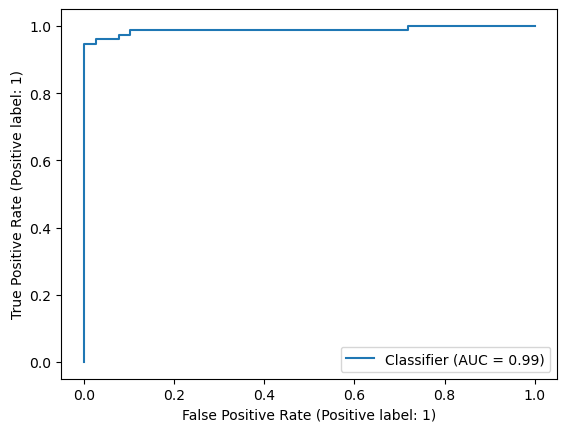

In [529]:
#繪製ROC曲線
from sklearn.metrics import RocCurveDisplay

y_pred = model.decision_function(X_test)
svc_disp = RocCurveDisplay.from_predictions(y_test,y_pred)
plt.show()

In [530]:
#在已標準化後的數據中，將全部30的特徵進行SVM訓練
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=10)

In [531]:
model_all=svm.SVC()
model_all.fit(X_train,y_train)
#RBF核函數是支持向量機中最常用的非線性內核函數，它可以有效地處理各種類型的數據。
#它是默認的內核函數，也是不指定kernel參數時的默認選項

pred = model_all.predict(X_test)

print(model_all.score(X_train,y_train))
print(model_all.score(X_test, y_test))

0.9846153846153847
0.9736842105263158


In [532]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[39  0]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.96      0.98        75

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [533]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_all,X_std, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9736842105263158
Fold 2: 0.956140350877193
Fold 3: 1.0
Fold 4: 0.9649122807017544
Fold 5: 0.9734513274336283
Mean Score: 0.9736376339077782


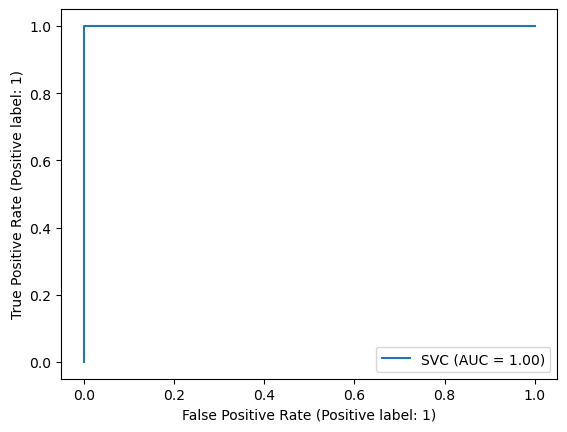

In [534]:
#繪製ROC曲線
svc_disp = RocCurveDisplay.from_estimator(model_all,X_test,y_test)
plt.show()

In [535]:
'''
在已標準化的數據透過SVM訓練下，
只使用'mean concave points'和'area error'特徵集的平均分數為0.92，
而使用全部特徵的特徵集的平均分數為0.97；
只使用'mean concave points'和'area error'特徵集的F1-score為0.95，
而使用全部特徵的特徵集的F1-score為0.97。
這意味著'mean concave points'和'area error'這兩個特徵對於乳腺癌分類預測具有一定的預測能力，
它們可以在僅使用這兩個特徵的情況下得到相對較高的預測準確度與較高的F1-score。
'''

"\n在已標準化的數據透過SVM訓練下，\n只使用'mean concave points'和'area error'特徵集的平均分數為0.92，\n而使用全部特徵的特徵集的平均分數為0.97；\n只使用'mean concave points'和'area error'特徵集的F1-score為0.95，\n而使用全部特徵的特徵集的F1-score為0.97。\n這意味著'mean concave points'和'area error'這兩個特徵對於乳腺癌分類預測具有一定的預測能力，\n它們可以在僅使用這兩個特徵的情況下得到相對較高的預測準確度與較高的F1-score。\n"

In [536]:
#在已標準化後的數據並進行SVM訓練之下，找到兩個特徵組合集的重要度排序

In [537]:
from itertools import combinations

combinations_list=list(combinations(breast_cancer.feature_names, 2))
print(combinations_list)
print(len(combinations_list))


[('mean radius', 'mean texture'), ('mean radius', 'mean perimeter'), ('mean radius', 'mean area'), ('mean radius', 'mean smoothness'), ('mean radius', 'mean compactness'), ('mean radius', 'mean concavity'), ('mean radius', 'mean concave points'), ('mean radius', 'mean symmetry'), ('mean radius', 'mean fractal dimension'), ('mean radius', 'radius error'), ('mean radius', 'texture error'), ('mean radius', 'perimeter error'), ('mean radius', 'area error'), ('mean radius', 'smoothness error'), ('mean radius', 'compactness error'), ('mean radius', 'concavity error'), ('mean radius', 'concave points error'), ('mean radius', 'symmetry error'), ('mean radius', 'fractal dimension error'), ('mean radius', 'worst radius'), ('mean radius', 'worst texture'), ('mean radius', 'worst perimeter'), ('mean radius', 'worst area'), ('mean radius', 'worst smoothness'), ('mean radius', 'worst compactness'), ('mean radius', 'worst concavity'), ('mean radius', 'worst concave points'), ('mean radius', 'worst sy

In [538]:
model_all_com=svm.SVC()
scores_mean=[]

for i in range(len(combinations_list)):
    X_std_2_feature_com=pd.DataFrame(X_std,columns=combinations_list[i])
    X_train,X_test,y_train,y_test=train_test_split(X_std_2_feature_com,y,test_size=0.2,random_state=10)    
    model_all_com.fit(X_train,y_train)
    scores = cross_val_score(model_all_com,X_test,y_test, cv=3)
    scores_mean.append(scores.mean())

In [539]:
print(len(scores_mean))

435


In [540]:
indices = np.argsort(scores_mean) #np.argsort :Returns the indices that would sort an array.

In [541]:
combinations_list=np.array(combinations_list)
important_2_feature_sort_ascend=combinations_list[indices]
important_2_feature_sort_descend=important_2_feature_sort_ascend[::-1]

scores_mean=np.array(scores_mean)
scores_mean_descend=scores_mean[indices][::-1]

print('2個特徵組合的重要度排序前10名：')
for i in range(10):
    print('第',i+1,'名')
    print(important_2_feature_sort_descend[i])
    print(scores_mean_descend[i])


2個特徵組合的重要度排序前10名：
第 1 名
['mean concave points' 'radius error']
0.9736842105263158
第 2 名
['mean concave points' 'perimeter error']
0.9649122807017544
第 3 名
['radius error' 'worst concave points']
0.9649122807017544
第 4 名
['mean compactness' 'worst area']
0.9649122807017544
第 5 名
['mean compactness' 'worst radius']
0.9649122807017544
第 6 名
['worst area' 'worst compactness']
0.9649122807017543
第 7 名
['mean compactness' 'worst perimeter']
0.9561403508771931
第 8 名
['mean concave points' 'worst texture']
0.956140350877193
第 9 名
['mean concave points' 'texture error']
0.956140350877193
第 10 名
['mean concave points' 'area error']
0.956140350877193


In [542]:
A=('mean concave points','area error')
indices_specific = np.where(np.all(combinations_list == A,axis=1))[0]
print(indices_specific)

[187]


In [543]:
combinations_list[187]

array(['mean concave points', 'area error'], dtype='<U23')

In [544]:
scores_mean[187]

0.956140350877193

In [545]:
'''
雖然'mean concave points', 'area error'，在已標準化後的數據並進行SVM訓練之下，
該兩個特徵組合集的重要度排序為第10名，但依然有0.956分，
相比較下，其他排名較前的兩個特徵組合集亦可能具有對分類預測有重要貢獻的信息，
並且可以發現在前10名的組合中，mean concave points的特徵出現最多次，共出現5次，
這意味著'mean concave points這個特徵對於乳腺癌分類預測具有一定的預測能力，
它可能對腫瘤是否為良性具有重要解釋的關鍵因素。
'''

"\n雖然'mean concave points', 'area error'，在已標準化後的數據並進行SVM訓練之下，\n該兩個特徵組合集的重要度排序為第10名，但依然有0.956分，\n相比較下，其他排名較前的兩個特徵組合集亦可能具有對分類預測有重要貢獻的信息，\n並且可以發現在前10名的組合中，mean concave points的特徵出現最多次，共出現5次，\n這意味著'mean concave points這個特徵對於乳腺癌分類預測具有一定的預測能力，\n它可能對腫瘤是否為良性具有重要解釋的關鍵因素。\n"

In [546]:
#在未標準化的數據，只取'mean concave points', 'area error'特徵進行decision tree訓練
#由於決策樹算法基於特徵的閾值來進行分割，因此它們對特徵的尺度不敏感

X_2_feature=pd.DataFrame(X,columns=['mean concave points', 'area error'])
print(X_2_feature.head())

   mean concave points  area error
0              0.14710      153.40
1              0.07017       74.08
2              0.12790       94.03
3              0.10520       27.23
4              0.10430       94.44


In [547]:
X_train,X_test,y_train,y_test=train_test_split(X_2_feature,y,test_size=0.2,random_state=10)

In [548]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [549]:
print('training score:',clf.score(X_train,y_train))
print('test score:',clf.score(X_test,y_test))

training score: 0.9274725274725275
test score: 0.9035087719298246


In [550]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[32  7]
 [ 4 71]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.91      0.95      0.93        75

    accuracy                           0.90       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



In [551]:
scores = cross_val_score(clf,X, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9035087719298246
Fold 2: 0.9122807017543859
Fold 3: 0.956140350877193
Fold 4: 0.9385964912280702
Fold 5: 0.9557522123893806
Mean Score: 0.9332557056357709


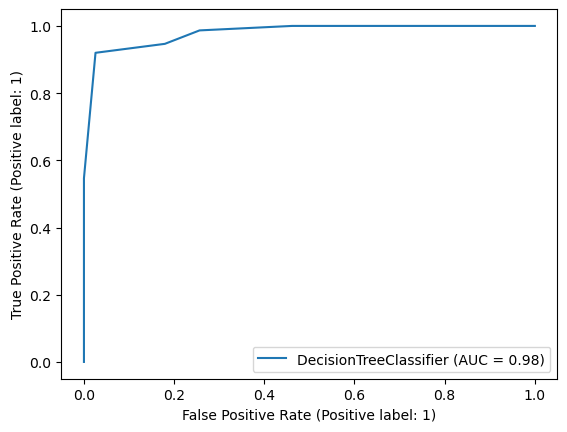

In [552]:
#繪製ROC曲線
svc_disp = RocCurveDisplay.from_estimator(clf,X_test,y_test)
plt.show()

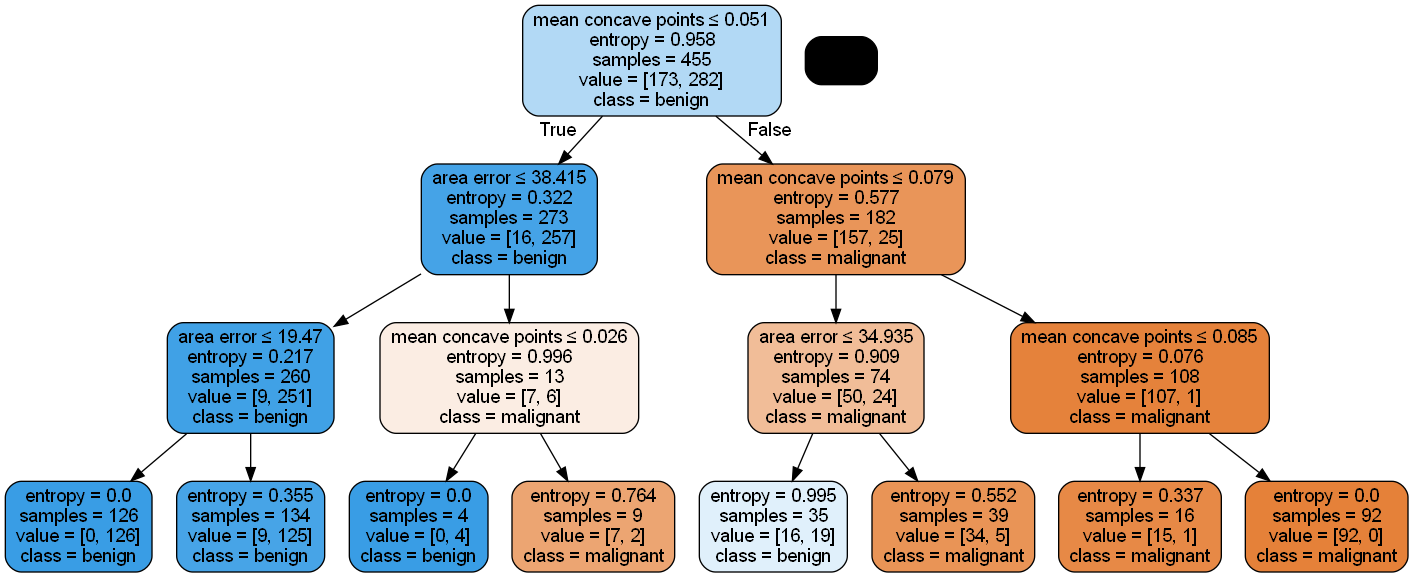

In [553]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image  
#將 Decisson Tree Classifier 放入
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=['mean concave points', 'area error'],  
                         class_names=breast_cancer.target_names,
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [554]:
#在已標準化的數據，只取'mean concave points', 'area error'特徵進行Logistic regression訓練
#由於由於Logistic Regression在進行優化時，求解器（solver）可能對數據的尺度敏感。
#標準化可以消除特徵尺度的差異，減小噪聲特徵的影響，並提供更穩定的優化過程。

X_std_2_feature=pd.DataFrame(X_std,columns=['mean concave points', 'area error'])
print(X_std_2_feature.head())

   mean concave points  area error
0             2.532475    2.487578
1             0.548144    0.742402
2             2.037231    1.181336
3             1.451707   -0.288378
4             1.428493    1.190357


In [555]:
X_train,X_test,y_train,y_test=train_test_split(X_std_2_feature,y,test_size=0.2,random_state=10)

In [556]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print('training score:',lr.score(X_train,y_train))
print('test score:',lr.score(X_test,y_test))

training score: 0.9142857142857143
test score: 0.9473684210526315


In [557]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[34  5]
 [ 1 74]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [558]:
scores = cross_val_score(lr,X_std, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9824561403508771
Fold 2: 0.9736842105263158
Fold 3: 0.9736842105263158
Fold 4: 0.9736842105263158
Fold 5: 0.9911504424778761
Mean Score: 0.9789318428815402


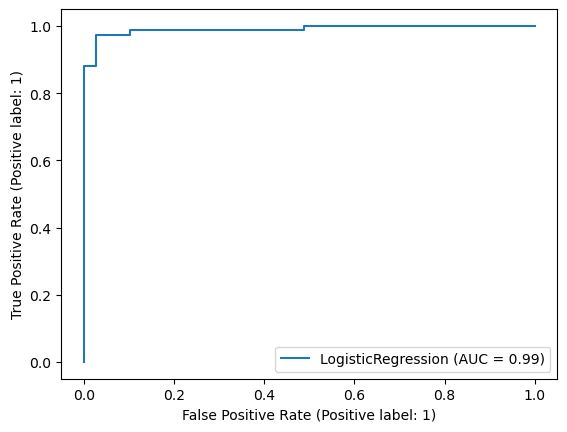

In [559]:
#繪製ROC曲線
svc_disp = RocCurveDisplay.from_estimator(lr,X_test,y_test)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


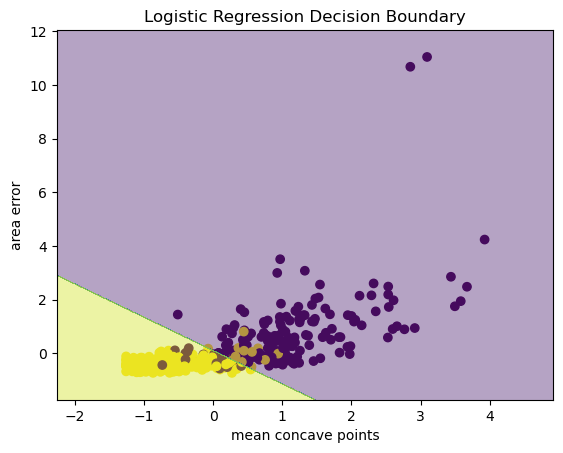

In [560]:


# 創建網格點
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# 預測網格點的類別
Z = lr.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# 繪製散點圖
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1],c=y_train)

# 繪製決策邊界線
plt.contourf(xx1, xx2, Z, alpha=0.4)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('mean concave points')
plt.ylabel('area error')


plt.show()









In [561]:
#在未標準化的數據，只取'mean concave points', 'area error'特徵進行Adaboost訓練
#AdaBoost的主要關注點是樣本的權重調整，而不是特徵的縮放或標準化。
#因此，即使數據沒有進行縮放或標準化，AdaBoost仍然可以有效地工作

X_2_feature=pd.DataFrame(X,columns=['mean concave points', 'area error'])
print(X_2_feature.head())

   mean concave points  area error
0              0.14710      153.40
1              0.07017       74.08
2              0.12790       94.03
3              0.10520       27.23
4              0.10430       94.44


In [562]:
X_train,X_test,y_train,y_test=train_test_split(X_2_feature,y,test_size=0.2,random_state=50)

In [563]:
AdaBoost_2 = AdaBoostClassifier(n_estimators=100) 
AdaBoost_2.fit(X_train, y_train)
pred_2 = AdaBoost_2.predict(X_test)

In [564]:
print('training score:',AdaBoost_2.score(X_train,y_train))
print('test score:',AdaBoost_2.score(X_test,y_test))

training score: 0.9604395604395605
test score: 0.9385964912280702


In [565]:
print(confusion_matrix(y_test,pred_2))
print(classification_report(y_test,pred_2))

[[36  3]
 [ 4 71]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.96      0.95      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [566]:
scores = cross_val_score(AdaBoost_2,X, y, cv=5)

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())

Fold 1: 0.9473684210526315
Fold 2: 0.956140350877193
Fold 3: 0.9912280701754386
Fold 4: 0.9912280701754386
Fold 5: 0.9823008849557522
Mean Score: 0.9736531594472908


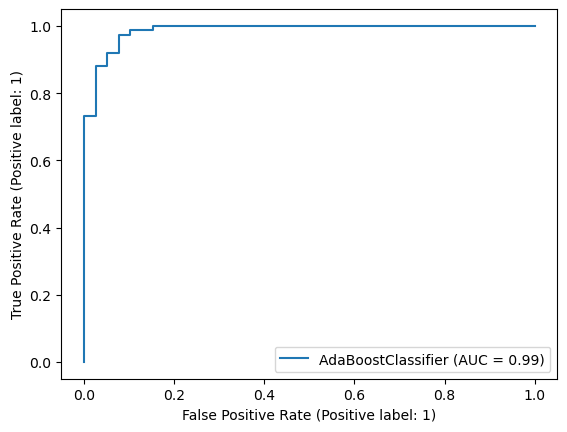

In [567]:
#繪製ROC曲線
svc_disp = RocCurveDisplay.from_estimator(AdaBoost_2,X_test,y_test)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


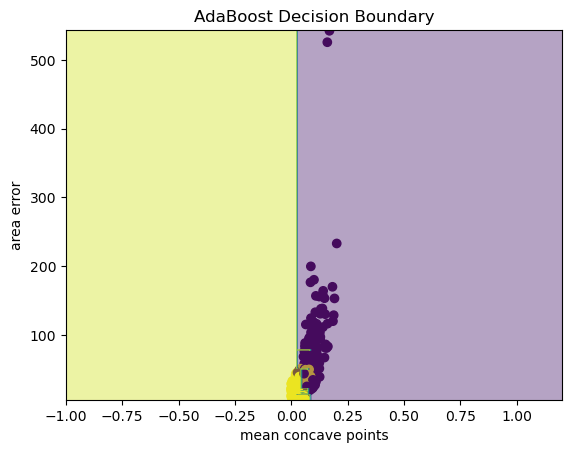

In [568]:
#AdaBoost算法本身並不直接生成決策邊界線；
#然而，可以通過繪製模型在特徵空間中的分類結果來近似可視化決策邊界。


# 創建網格點
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# 預測網格點的類別
Z = AdaBoost_2.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# 繪製散點圖
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1],c=y_train)

# 繪製決策邊界線
plt.contourf(xx1, xx2, Z, alpha=0.4)

plt.title('AdaBoost Decision Boundary')
plt.xlabel('mean concave points')
plt.ylabel('area error')


plt.show()


In [569]:
importances = AdaBoost_2.feature_importances_

In [570]:
print(importances)
indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array.
print(indices)
features =X_train.keys()
print(features)

[0.61 0.39]
[1 0]
Index(['mean concave points', 'area error'], dtype='object')


Text(0.5, 0, 'Relative Importance')

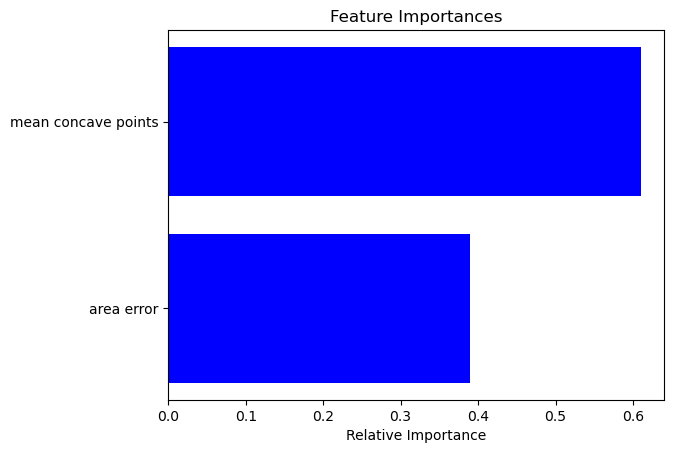

In [571]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

training score: 0.9120879120879121
test score: 0.9473684210526315
[[35  4]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.95      0.97      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Fold 1: 0.956140350877193
Fold 2: 0.9824561403508771
Fold 3: 0.9649122807017544
Fold 4: 0.9649122807017544
Fold 5: 0.9823008849557522
Mean Score: 0.9701443875174661


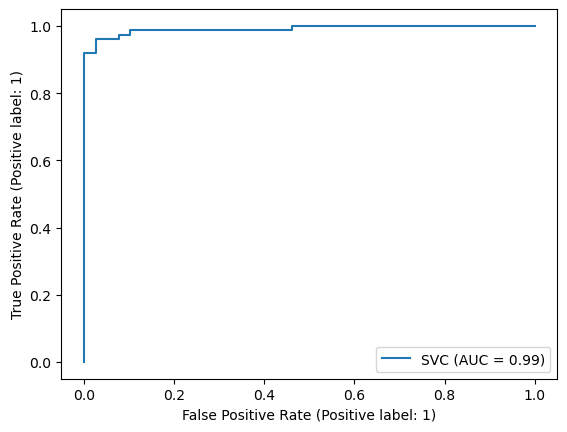

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


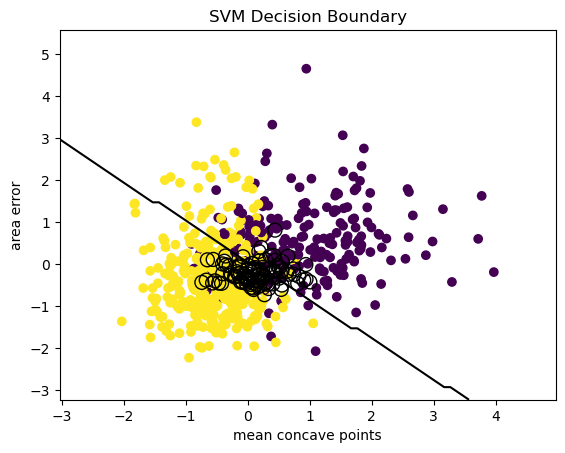

In [572]:
#在已標準化後的數據，只取'mean concave points', 'area error'特徵進行SVM的線性的核函數訓練

X_std_2_feature=pd.DataFrame(X_std,columns=['mean concave points', 'area error'])

X_train,X_test,y_train,y_test=train_test_split(X_std_2_feature,y,test_size=0.2,random_state=10)

model=svm.SVC(kernel="linear")
model.fit(X_train,y_train)
#使用線性核函數

pred = model.predict(X_test)

print('training score:',model.score(X_train,y_train))
print('test score:',model.score(X_test,y_test))

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


scores = cross_val_score(model,X_std, y, cv=5)
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score}")
    
print("Mean Score:", scores.mean())


#繪製ROC曲線
svc_disp = RocCurveDisplay.from_estimator(model,X_test,y_test)
plt.show()



#獲得支持向量
support_vectors = model.support_vectors_

#獲得決策邊界參數
w = model.coef_[0]
b = model.intercept_[0]

#繪製數據點 
plt.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1], c=y)

#繪製支持向量(黑色圈圈)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,facecolors='none', edgecolors='k')

#繪製決策邊界線
x_min, x_max = X_std.iloc[:, 0].min() - 1, X_std.iloc[:, 0].max() + 1
y_min, y_max = X_std.iloc[:, 1].min() - 1, X_std.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', linestyles=['-'], levels=[0])

plt.xlabel('mean concave points')
plt.ylabel('area error')
plt.title('SVM Decision Boundary')
plt.show()

In [573]:
'''
多個黑色圈圈出現在決策邊界上的涵義是這些點被標識為支持向量（Support Vectors）。
這有助於將它們與其他數據點區分開來，並強調它們在模型中的重要性。 
因此，當在SVM的決策邊界上看到多個黑色圈圈時，
它們表示了訓練數據中離決策邊界最近的支持向量點，
這些點對於模型的決策邊界起到關鍵作用。
因為它們確定了決策邊界的位置和形狀。
'''

'\n多個黑色圈圈出現在決策邊界上的涵義是這些點被標識為支持向量（Support Vectors）。\n這有助於將它們與其他數據點區分開來，並強調它們在模型中的重要性。 \n因此，當在SVM的決策邊界上看到多個黑色圈圈時，\n它們表示了訓練數據中離決策邊界最近的支持向量點，\n這些點對於模型的決策邊界起到關鍵作用。\n因為它們確定了決策邊界的位置和形狀。\n'